In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import transformers

In [81]:
philly_reviews = []

with open('philadelphia_reviews.json') as json_data:
    data = json.load(json_data)
    count = 0 
    for val in data: 
        philly_reviews.extend(data[val])
        count += len(data[val])
        if count >= 30000: break
    philly = pd.DataFrame(philly_reviews)
philly

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
1,HME_ksGph3se7Aze5hxa-Q,kSMOJwJXuEUqzfmuFncK4A,kxX2SOes4o-D3ZQBkiMRfA,2.0,0,0,1,Dine-in gets 2 stars. Disappointing service & ...,2014-07-13 17:25:47
2,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5.0,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04
3,T_kAb2NeylB-JdNDKphryw,Z-xgVb4nM42943m2wbBkFw,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,1,1,We've eaten here 3 times and it seems that eac...,2017-01-02 14:25:26
4,NENaCqb6TNj5CyY1LOdI6Q,2SEoXb6r6hPKrl9V9VzBgA,kxX2SOes4o-D3ZQBkiMRfA,5.0,0,0,0,Came to Philly for a family event but stayed a...,2015-07-28 17:15:20
...,...,...,...,...,...,...,...,...,...
30058,kROtd9eXnrIL-1VLSICqxg,tm48CF3WIXBgHD4JLjQIwA,p1PQZFieSwQVd3PPtuaL8A,1.0,0,0,0,We were celebrating a birthday dinner at Core ...,2012-02-29 02:40:51
30059,VgHrmO7qJF-vfsdbL5mD8w,y0MwqMMYGt9lvQQsFVB-ug,p1PQZFieSwQVd3PPtuaL8A,4.0,0,0,0,We were on South Street and I mentioned to my ...,2013-06-24 00:22:04
30060,J1D8ruUYcMS1-zItUoPr9g,-OZPBHH7RzyPIai4AlPWKA,p1PQZFieSwQVd3PPtuaL8A,4.0,3,1,2,I'm a fan of the fettucini in bolognese sauce ...,2013-06-24 00:17:27
30061,vezgOqQGzUdo18-9qcypRw,dZukfy_20W5oVZ7ESfpMog,p1PQZFieSwQVd3PPtuaL8A,5.0,0,0,0,Get the specials. Great drinks good pour on th...,2012-05-23 21:12:47


In [5]:
reviews = []
with open('santa_barbara_reviews.json') as json_data:
    data = json.load(json_data)
    count = 0
    for val in data: 
        reviews.extend(data[val][:75])
        count += len(data[val])
        if count >= 30000: break  
    sb = pd.DataFrame(reviews)
sb

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,zM7u3iffMjniyvQAaN9Tnw,QacYrFyCrFLmC726YEEBsA,29YqJwOGEuAWqlHZxMc1OA,1.0,0,1,0,So disappointing on so many levels. Have been ...,2012-05-29 03:51:08
1,wh9ea5TEl4oKiSr2k_R1eA,bnDnNy1RaJXY-12Sh3D0WA,29YqJwOGEuAWqlHZxMc1OA,4.0,1,0,1,We were on our way home from a camping trip an...,2016-01-04 03:55:32
2,mcVDsGVUncpg6LJeZ961NQ,eE44UBdsymNSnaMnIDwwOQ,29YqJwOGEuAWqlHZxMc1OA,4.0,0,0,1,My wife and I have been coming to Paradise for...,2016-06-22 21:51:45
3,T348a5HPcv00_jxnlSZe-w,a_iFcnIHwsb9ww81kRYirA,29YqJwOGEuAWqlHZxMc1OA,5.0,0,0,0,Been here twice...once just for drinks and onc...,2014-07-28 05:56:16
4,TYslH-CAecjJxLNs96KduA,XCsZ3hWa_6oP1WkWvK7pmg,29YqJwOGEuAWqlHZxMc1OA,5.0,0,0,0,Lovely little restaurant which was converted f...,2005-03-01 17:47:15
...,...,...,...,...,...,...,...,...,...
24071,0hAjxTohK8zyHP5JjU-qwQ,LcBZt_bpU5CqwtDJwB3OCg,hlb7WwqcCijqqbp8zye1dw,5.0,20,10,16,This is Santa Barbara's first Roman style pizz...,2020-07-11 21:04:24
24072,BgP9asdE9RWcDklVkhzXaA,ZyTB3nkpaZuU8ddv9i_toQ,hlb7WwqcCijqqbp8zye1dw,5.0,0,1,0,"Great pizza: Sauce is good, fresh - not grea...",2020-09-03 02:02:19
24073,UBmtceIrLfB96IuMaGVN1w,3X9h2zkRINq6DnpkxJEhVw,hlb7WwqcCijqqbp8zye1dw,5.0,0,0,1,"By far the best pizza in town! Great toppings,...",2020-12-14 02:24:05
24074,v6G4YnGE2ZaSK84r2O8svA,Dft_H62Zz6-SmsMg74SEOQ,hlb7WwqcCijqqbp8zye1dw,4.0,0,0,0,Excellent pizza! My favorite part is by far th...,2020-08-14 22:04:44


## Model 1: Text Classification (Emotion)

In [22]:
with open('philly_emotion_classification.json') as json_data:
    data = json.load(json_data)
    philly_emotion = pd.DataFrame(data)

with open('sb_emotion_classification.json') as json_data:
    data = json.load(json_data)
    sb_emotion = pd.DataFrame(data)


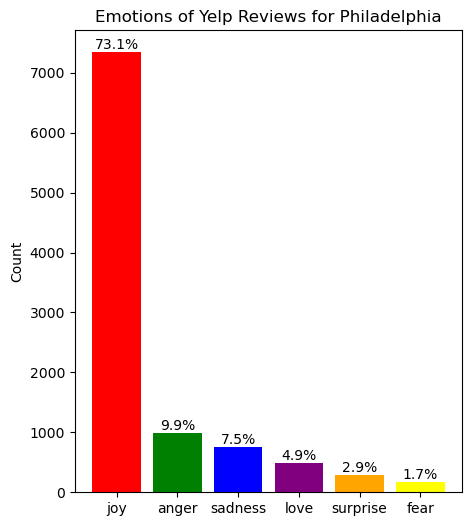

In [32]:
plt.figure(figsize=(5, 6))
counts = philly_emotion['classification'].value_counts()
total_count = len(philly_emotion)
category_percentages = counts / total_count * 100
bars = plt.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
for bar, percentage in zip(bars, category_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
plt.title('Emotions of Yelp Reviews for Philadelphia')
plt.ylabel('Count')
plt.show()

In [42]:
import json
biz_to_cuisine = {}
with open('philadelphia_businesses.json', 'r') as file:
    for line in file:
        all_businesses = json.loads(line)
        break
for b in all_businesses.keys():
    cur = all_businesses[b]
    categories = cur['categories']
    if categories:
        categories = cur['categories'].split(",")
        for category in categories:
            cat = category.strip()
            if cat != 'Restaurants' and cat != 'Bakeries' and cat != 'Bars' and cat != 'Coffee' and cat != 'Tea' and cat !='Ethnic Food':
                biz_to_cuisine[cur['business_id']] = cat
                break
    else:
        biz_to_cuisine[cur['business_id']] = "None"

with open('santa_barbara_businesses.json', 'r') as file:
    for line in file:
        all_businesses = json.loads(line)
        break
for b in all_businesses.keys():
    cur = all_businesses[b]
    categories = cur['categories']
    if categories:
        categories = cur['categories'].split(",")
        for category in categories:
            cat = category.strip()
            if cat != 'Restaurants' and cat != 'Bakeries' and cat != 'Bars' and cat != 'Coffee' and cat != 'Tea' and cat !='Ethnic Food':
                biz_to_cuisine[cur['business_id']] = cat
                break
    else:
        biz_to_cuisine[cur['business_id']] = "None"
        
        


In [43]:
cuisines = []
for index, row in philly_emotion.iterrows():
    if row['business_id'] in biz_to_cuisine:
        cuisines.append(biz_to_cuisine[row['business_id']])
    else:
        cuisines.append("None")
philly_emotion['cuisine'] = cuisines

cuisines = []
for index, row in sb_emotion.iterrows():
    if row['business_id'] in biz_to_cuisine:
        cuisines.append(biz_to_cuisine[row['business_id']])
    else:
        cuisines.append("None")
sb_emotion['cuisine'] = cuisines

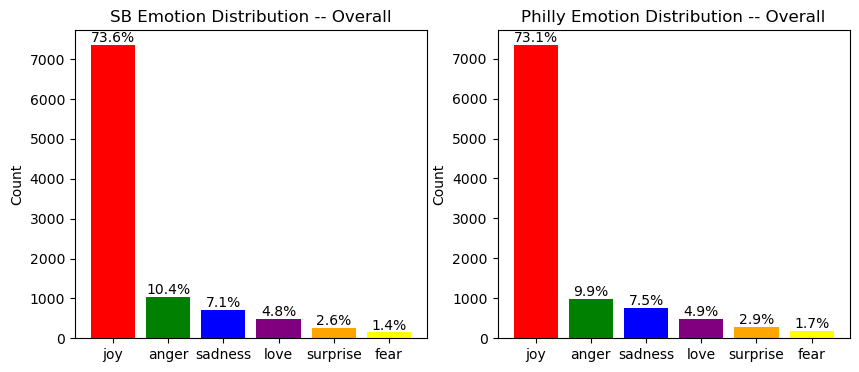

In [70]:
philly= philly_emotion
sb = sb_emotion
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ax1,ax2= axes
counts = sb['classification'].value_counts()
category_percentages = counts / len(sb) * 100
bars = ax1.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
for bar, percentage in zip(bars, category_percentages):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
title = 'SB Emotion Distribution -- Overall'

ax1.set_title(title)
ax1.set_ylabel('Count')

counts = philly['classification'].value_counts()
category_percentages = counts / len(philly) * 100
bars = ax2.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
for bar, percentage in zip(bars, category_percentages):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
title = 'Philly Emotion Distribution -- Overall'
ax2.set_title(title)
ax2.set_ylabel('Count')
plt.show()


In [65]:
def get_cuisine_visualization(cuisine):
    query_string = "cuisine=='"+cuisine+"'"
    philly= philly_emotion.query(query_string)
    sb = sb_emotion.query(query_string)
    fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
    ax1,ax2= axes
    counts = sb['classification'].value_counts()
    category_percentages = counts / len(sb) * 100
    bars = ax1.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
    for bar, percentage in zip(bars, category_percentages):
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
    title = 'SB Emotion Distribution -- '+cuisine

    ax1.set_title(title)
    ax1.set_ylabel('Count')

    counts = philly['classification'].value_counts()
    category_percentages = counts / len(philly) * 100
    bars = ax2.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
    for bar, percentage in zip(bars, category_percentages):
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
    title = 'Philly Emotion Distribution -- '+cuisine
    ax2.set_title(title)
    ax2.set_ylabel('Count')
    plt.show()


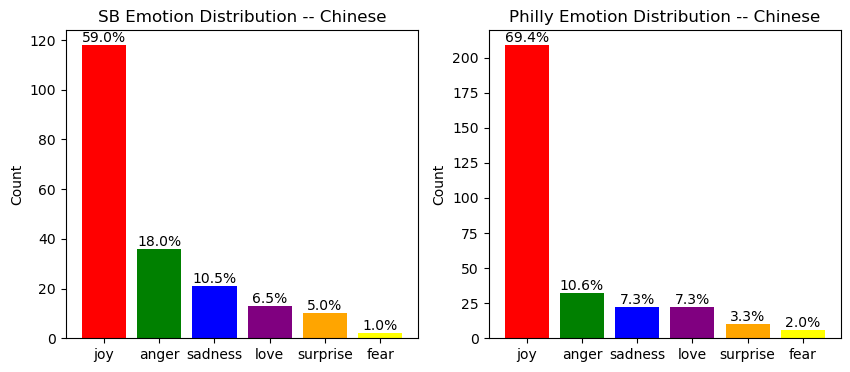

In [67]:
get_cuisine_visualization("Chinese")

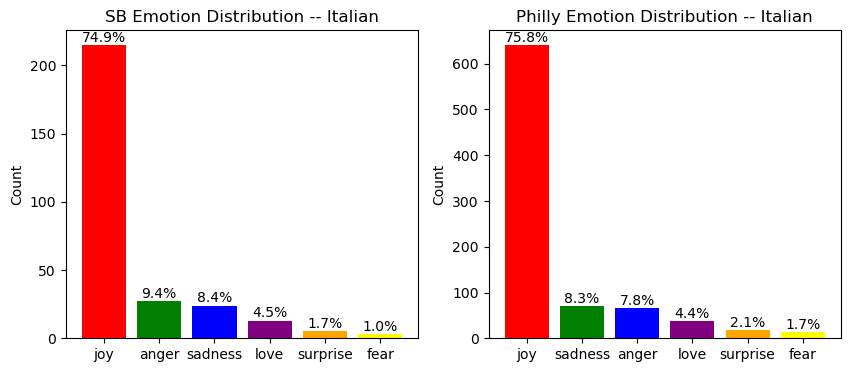

In [79]:
get_cuisine_visualization("Italian")

# Model 2: Text Classification (Positive/Negative)

In [93]:
with open('philadelphia_review_classification.json') as json_data:
    data = json.load(json_data)
    philly_revs= pd.DataFrame(data)
philly_revs["classification"]= philly_revs.apply(lambda x: x['classification'].replace('LABEL_1', "Positive"), axis=1)
philly_revs["classification"]= philly_revs.apply(lambda x: x['classification'].replace('LABEL_0', "Negative"), axis=1)
with open('sb_emotion_classification.json') as json_data:
    data = json.load(json_data)
    sb_revs= pd.DataFrame(data)

sb_revs["classification"]= sb_revs.apply(lambda x: x['classification'].replace('LABEL_1', "Positive"), axis=1)
sb_revs["classification"]= sb_revs.apply(lambda x: x['classification'].replace('LABEL_0', "Negative"), axis=1)


Text(0, 0.5, 'Count')

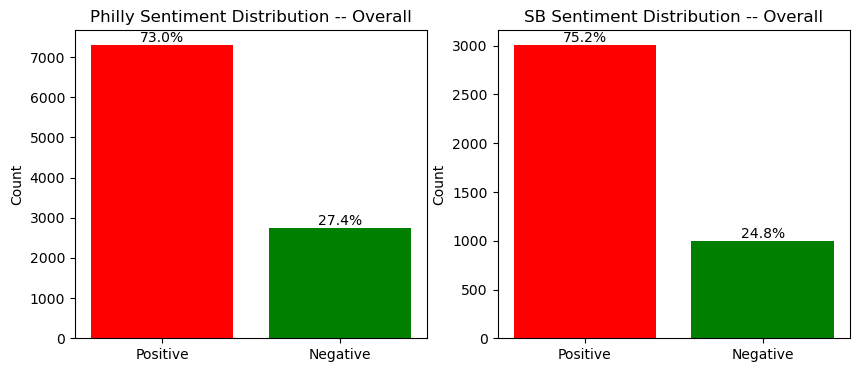

In [105]:
philly= philly_revs
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ax1,ax2= axes
counts = philly['classification'].value_counts()
category_percentages = counts / len(sb) * 100
bars = ax1.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
for bar, percentage in zip(bars, category_percentages):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
title = 'Philly Sentiment Distribution -- Overall'

ax1.set_title(title)
ax1.set_ylabel('Count')

sb = sb_revs
counts = sb['classification'].value_counts()
category_percentages = counts / len(sb) * 100
bars = ax2.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
for bar, percentage in zip(bars, category_percentages):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
title = 'SB Emotion Distribution -- Overall'
ax2.set_title(title)
ax2.set_ylabel('Count')
plt.show()

In [95]:
cuisines = []
for index, row in philly_revs.iterrows():
    if row['business_id'] in biz_to_cuisine:
        cuisines.append(biz_to_cuisine[row['business_id']])
    else:
        cuisines.append("None")
philly_revs['cuisine'] = cuisines

cuisines = []
for index, row in sb_emotion.iterrows():
    if row['business_id'] in biz_to_cuisine:
        cuisines.append(biz_to_cuisine[row['business_id']])
    else:
        cuisines.append("None")
sb_emotion['cuisine'] = cuisines

In [191]:
def get_cuisine_visualization_posneg(cuisine):
    query_string = "cuisine=='"+cuisine+"'"
    philly= philly_revs.query(query_string)
    sb = sb_emotion.query(query_string)
    fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
    ax1,ax2= axes
    counts = sb['classification'].value_counts()
    category_percentages = counts / len(t) * 100
    bars = ax1.bar(counts.index, counts, color=['red', 'green'])
    for bar, percentage in zip(bars, category_percentages):
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
    title = 'SB Emotion Distribution -- '+cuisine'

    ax1.set_title(title)
    ax1.set_ylabel('Count')

    counts = philly['classification'].value_counts()
    category_percentages = counts / len(philly) * 100
    bars = ax2.bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
    for bar, percentage in zip(bars, category_percentages):
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
    title = 'Philly Emotion Distribution -- '+cuisine
    ax2.set_title(title)
    ax2.set_ylabel('Count')
    plt.show()

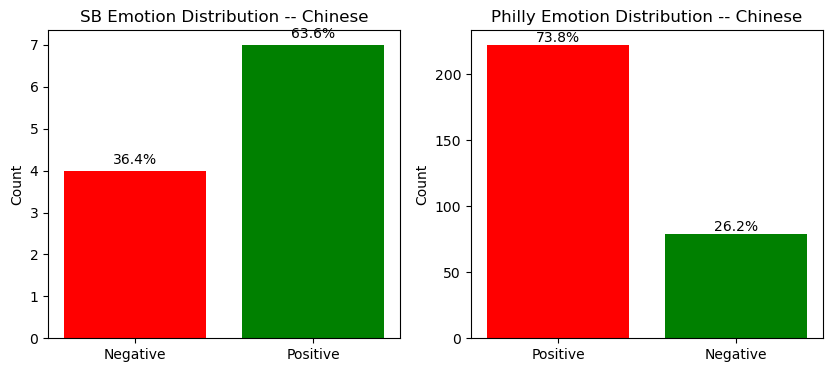

In [192]:
get_cuisine_visualization_posneg("Chinese")